C:\Users\cp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


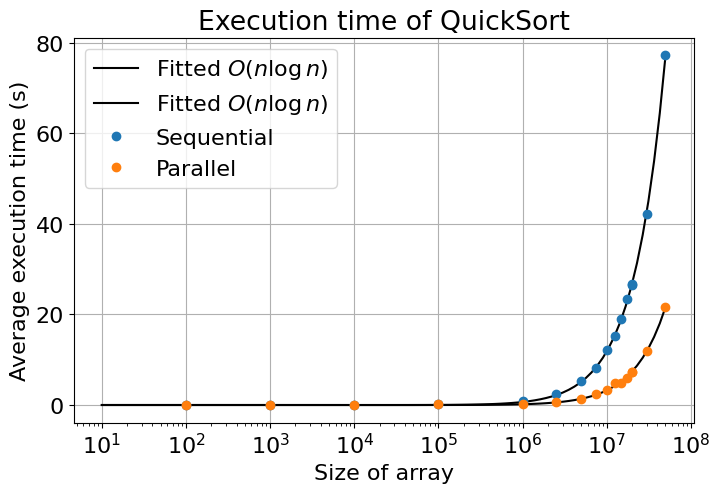

In [10]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams['font.size'] = 16

data = pd.read_csv("times.csv")
X_exp = data['N']
Y_exp = data.iloc[:, 1:3] / 10**3

fit_func = lambda n,a,b : a*n*np.log(b*n)
params0, _ = curve_fit(fit_func, X_exp, Y_exp.iloc[:,0])
params1, _ = curve_fit(fit_func, X_exp, Y_exp.iloc[:,1])
X_fit = np.logspace(1, math.log(max(X_exp), 10), 100)
Y_fit = [[fit_func(n, *params0), fit_func(n, *params1)] for n in X_fit]

plt.figure(figsize=(8, 5))
plt.semilogx(X_fit, Y_fit, 'k-', label=r"Fitted $O(n\log{n})$")
plt.semilogx(X_exp, Y_exp, 'o', label=["Sequential", "Parallel"])
plt.title("Execution time of QuickSort")
plt.xlabel("Size of array")
plt.ylabel("Average execution time (s)")
plt.grid(True)
plt.legend()
plt.show()